<a href="https://colab.research.google.com/github/kumarabhinavthakur274/Play_Store_-App_-Review_Analysis---Capstone-Project/blob/main/Kumar_Abhinav_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Imporating Required Libraries**

In [1]:
import pandas as pd                #importing pandas for data manipulation
import numpy as np                 # importing numpy for mathematical operation
import matplotlib.pyplot as plt     #importing matplotlib and seaborn for data visualization
import seaborn as sns

import warnings                     # importing module for ignoring warnings 
warnings.filterwarnings("ignore")

# **Mounting Drive and Loading data for analysis**

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing primary data set on Play store app review Analysis
df = pd.read_csv("/content/drive/MyDrive/Project/playstore/Play Store Data.csv")


In [4]:
# importing secondry data set on user review analysis
df1 = pd.read_csv("/content/drive/MyDrive/Project/playstore/User Reviews.csv")

# **Basic Data Overview**

**for Primary dataframe :**

In [5]:
df.head(5)         # printing top 5 instances

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.tail(5)            #printing bottom 5 instances

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
df.shape              #printing the shape of the dataframe

(10841, 13)

In [8]:
df.info()             #checking for column wise information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
len(df[df.duplicated()])                #checking for duplicated instance in the primary dataframe

483

In [10]:
df.describe()                     # here we can see that one column "Rating" is numaric other numeric attributes are in string.

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [11]:
df.isnull().sum().sort_values(ascending=False)          #checking for null values column wise

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

**for secondry dataframe:**

In [12]:
df1.head(5)             #printing 5 instances of secondry dataset

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [13]:
df1.tail(5)             #printing 5 instances of secondry dataset

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [14]:
df1.shape              #checking the shape of secondry dataset

(64295, 5)

In [15]:
df1.info()             #checking column wise information 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [16]:
len(df1[df1.duplicated()]) #checking for duplicated instance in secondry data frame

33616

In [17]:
df1.describe()        #checking for description of numarical datatypes

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [18]:
df1.isnull().sum().sort_values(ascending=False) #checking for all the null values


Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
App                           0
dtype: int64

# **Data Cleaning**

**Task at hand :**

1.   Drop duplicated instances from both the data frames.
2.   Drop or substitue null values as per requirement.
3.   Replace Numerical columns given as 'object' to float values.
4.   Conversion of Different Units given for a particular column to a common one to avoid miscalculation.
5. Drop or replace wrong data as per requirement. 



**Dropping the duplicated instances** 

In [19]:
df = df.drop_duplicates() #dropping the duplicates from primary dataframe 

In [20]:
df1 = df1.drop_duplicates() #dropping the duplicates from secondary dataframe

**Lets treat the 'Rating' column**

In [21]:
# we know that 'column rating'  is in interger form so lets chek for null values
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

Since some of the apps are not rated so we need to replace null values and wrong ratings with zero.

In [22]:
#1. Substituting the Null and values greater than 5 (wrong ratings) with 0
df['Rating'] = df['Rating'].fillna(0)
df['Rating'] = df['Rating'].replace(19.,0,regex = True)

In [23]:
# yeahhh Rating column is treated
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 0. , 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

**Lets Tackle the Reviews column now**

In [24]:
# converting the string data to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'],errors ='coerce')
# substituting all the null values in data set with 0
df['Reviews'] = df['Reviews'].replace(np.nan,0,regex = True)
# changing the data type of Reviews 
df['Reviews'] = df['Reviews'].astype(int)

In [25]:
df.info()   #now check the dtype of Reviews , task is done

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


**Lets Treat the price column**

In [26]:
df['Price'].unique() #we have to remove the dollor symbols and then convert it into float

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In the above cell we can see that there some wrong value named Everyone out of no where lets eliminate it

In [27]:
# checking for Everyone(wrong data)
temp_df = df['Price'].value_counts().reset_index()
temp_df[temp_df["index"]=="Everyone"]

,index,Price
52,Everyone,1


In [28]:
# eliminating dollor symbol
df['Price'] = df['Price'].str.replace('$','')
# Replacing Everyone with 0
df['Price'] = df['Price'].replace('Everyone',0,regex = True)
# Now converting the data type into float
df['Price'] = df['Price'].astype(float)

In [29]:
df.info()  # we can see that task is done

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


**Lets treat Installs column**

In [30]:
df.Installs.unique() #checking for unique values in the column

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In the Installs column we can see the '+' (plus) symbol which we need to remove along with that we need to convert the string to float, there is a wrong data "Free" which we need to eliminate or replace.

In [31]:
# replacing the plus symbol with nothing 
df.Installs = df.Installs.apply(lambda x:x.replace('+',''))
# replacing wrong data "Free" with "0" 
df['Installs'] = df['Installs'].replace('Free',"0",regex = True)
# replacing comma(,) with nothing
df['Installs'] = df['Installs'].replace(',','',regex = True)
# finally we will convert the data into float
df['Installs'] = df['Installs'].astype(float)

In [32]:
df.head(5)   # lets check the data for the changes that we have implimented, yes we can see the changes

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Let us treat the Size column now**

In [33]:
df.Size.unique()    # checking for unique values in the column

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

To convert the string data in Size Column into numerical data we need to do the following task: 

* Remove M and K from the data
* convert it into common unit (kb) in float  (considering 1 mb = 1000 kb)



In [34]:
def Replace_M_k(x):
  ''' this function takes the row element (Size column) and 
      returns te replacement of 'M' with 000 and 'k' with nothing
      and 0 if there is other data than above.
  '''
  if "M" in x:
    return x.replace("M","000")
  elif "k" in x :
    return x.replace("k","")
  else:
    return 0

In [35]:
df['Size'] = df['Size'].apply(Replace_M_k)  # applying the above function for each row

In [36]:
df['Size'] = df['Size'].astype(float)  # converting the data type to float

In [37]:
print(list(df.Size.unique()) ) #we can see that some values(less than 20 mb) remained unaltered by above operation so we need multiplying 1000

[19000.0, 14000.0, 8.7, 25000.0, 2.8, 5.6, 29000.0, 33000.0, 3.1, 28000.0, 12000.0, 20000.0, 21000.0, 37000.0, 2.7, 5.5, 17000.0, 39000.0, 31000.0, 4.2, 7.0, 23000.0, 6.0, 6.1, 4.6, 9.2, 5.2, 11000.0, 24000.0, 0.0, 9.4, 15000.0, 10000.0, 1.2, 26000.0, 8.0, 7.9, 56000.0, 57000.0, 35000.0, 54000.0, 201.0, 3.6, 5.7, 8.6, 2.4, 27000.0, 2.5, 16000.0, 3.4, 8.9, 3.9, 2.9, 38000.0, 32000.0, 5.4, 18000.0, 1.1, 2.2, 4.5, 9.8, 52000.0, 9.0, 6.7, 30000.0, 2.6, 7.1, 3.7, 22000.0, 7.4, 6.4, 3.2, 8.2, 9.9, 4.9, 9.5, 5.0, 5.9, 13000.0, 73000.0, 6.8, 3.5, 4.0, 2.3, 7.2, 2.1, 42000.0, 7.3, 9.1, 55000.0, 23.0, 6.5, 1.5, 7.5, 51000.0, 41000.0, 48000.0, 8.5, 46000.0, 8.3, 4.3, 4.7, 3.3, 40000.0, 7.8, 8.8, 6.6, 5.1, 61000.0, 66000.0, 79.0, 8.4, 118.0, 44000.0, 695.0, 1.6, 6.2, 18.0, 53000.0, 1.4, 3.0, 5.8, 3.8, 9.6, 45000.0, 63000.0, 49000.0, 77000.0, 4.4, 4.8, 70000.0, 6.9, 9.3, 10.0, 8.1, 36000.0, 84000.0, 97000.0, 2.0, 1.9, 1.8, 5.3, 47000.0, 556.0, 526.0, 76000.0, 7.6, 59000.0, 9.7, 78000.0, 72000.0, 43

In [38]:
# multiplying the unaltered values with 1000 and passing the whole column element into list
size_list = []
for i in df.Size:
  if i< 20.0:
    size_list.append(i*1000)
  else:
    size_list.append(i)


In [39]:
df["Size"] = pd.DataFrame(size_list) #replacing the whole column with new set of threated values

In [40]:
print(list(df['Size'].unique())) #checking for unique values once again , yes task is done

[19000.0, 14000.0, 8700.0, 25000.0, 2800.0, 5600.0, 29000.0, 33000.0, 3100.0, 28000.0, 12000.0, 20000.0, 21000.0, 37000.0, 2700.0, 5500.0, 17000.0, 39000.0, 31000.0, 4200.0, 7000.0, 23000.0, 6000.0, 6100.0, 4600.0, 9200.0, 5200.0, 11000.0, 24000.0, 0.0, 9400.0, 15000.0, 10000.0, 1200.0, 26000.0, 8000.0, 7900.0, 56000.0, 57000.0, 35000.0, 54000.0, 201.0, 3600.0, 5700.0, 8600.0, 2400.0, 27000.0, 2500.0, 16000.0, 3400.0, 8900.0, 3900.0, 2900.0, 38000.0, 32000.0, 5400.0, 18000.0, 1100.0, 2200.0, 4500.0, 9800.0, 52000.0, 9000.0, 6700.0, 30000.0, 2600.0, 7100.0, 3700.0, 22000.0, 7400.0, 6400.0, 3200.0, 8200.0, 9900.0, 4900.0, 9500.0, 5000.0, 5900.0, 13000.0, 73000.0, 6800.0, 3500.0, 4000.0, 2300.0, 7200.0, 2100.0, 42000.0, 7300.0, 9100.0, 55000.0, 23.0, 6500.0, 1500.0, 7500.0, 41000.0, 48000.0, 8500.0, 46000.0, 7800.0, 8800.0, 6600.0, 5100.0, 3300.0, 40000.0, 61000.0, 66000.0, 79.0, 8300.0, 8400.0, 4300.0, 4700.0, 118.0, 44000.0, 695.0, 1600.0, 53000.0, 6200.0, 1400.0, 5800.0, 3800.0, 9600.0

In [41]:
df.info()  #check if above tasks has been reflectd or not

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  int64  
 4   Size            9876 non-null   float64
 5   Installs        10358 non-null  float64
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.1+ MB


In [42]:
df.isnull().sum().sort_values(ascending=False)  #lets check once how many null values are still left across the columns

Size              482
Current Ver         8
Android Ver         3
Type                1
Content Rating      1
App                 0
Category            0
Rating              0
Reviews             0
Installs            0
Price               0
Genres              0
Last Updated        0
dtype: int64

**Treating "Content Rating" column** 

In [43]:
df[df['Content Rating'].isnull()] #checking for the index of null values 


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,0.0,0,NaN,0.0,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [44]:
df= df.drop(10472) #dropping the column with null values

### **Treating "type" column**

In [45]:
# We will do the task same as above in this coluumn as well

In [46]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [47]:
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,0.0,0,53000.0,0.0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [48]:
df= df.drop(9148)

In [49]:
df.isnull().sum().sort_values(ascending=False)  #lets check once how many null values are still left across the columns

Size              481
Current Ver         8
Android Ver         2
App                 0
Category            0
Rating              0
Reviews             0
Installs            0
Type                0
Price               0
Content Rating      0
Genres              0
Last Updated        0
dtype: int64

**Treating column "Android ver" column**

In [50]:
df[df['Android Ver'].isnull()] #checking for null values


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,5100.0,1000.0,Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,0.0,10000.0,Free,0.00,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [51]:
# finding the highest occuring data in the column
temp_df = df.groupby('Android Ver').App.count().sort_values(ascending = False).reset_index() 
temp_df

,Android Ver,App
0,4.1 and up,2379
1,4.0.3 and up,1451
2,4.0 and up,1337
3,Varies with device,1220
4,4.4 and up,894
5,2.3 and up,643
6,5.0 and up,546
7,4.2 and up,387
8,2.3.3 and up,279
9,2.2 and up,239


In [52]:
# Replacing the null values with highest occuring android version
df['Android Ver'] = df['Android Ver'].replace(np.nan,"4.1 and up")  

**Treating 'current ver' column**

we will do the same task for this column as above

In [53]:
df[df['Current Ver'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,5000.0,Free,0.00,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,32000.0,1000000.0,Free,0.00,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,585.0,500000.0,Free,0.00,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,0.0,0,8800.0,100.0,Free,0.00,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,18000.0,50000.0,Paid,0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,0.0,44,9600.0,10000.0,Free,0.00,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,0.0,1,1500.0,10.0,Paid,0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,0.0,8,7700.0,1000.0,Free,0.00,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [54]:
temp_df1 = df.groupby('Current Ver').App.count().sort_values(ascending = False).reset_index()
temp_df1

,Current Ver,App
0,Varies with device,1301
1,1.0,802
2,1.1,260
3,1.2,177
4,2.0,149
...,...,...
2826,2.1.6579,1
2827,2.1.56,1
2828,2.1.54,1
2829,2.1.35,1


In [55]:
df['Current Ver'] = df['Current Ver'].replace(np.nan,"Varies with device")

In [56]:
df.isnull().sum().sort_values(ascending=False)  # finally there is no null values 

Size              481
App                 0
Category            0
Rating              0
Reviews             0
Installs            0
Type                0
Price               0
Content Rating      0
Genres              0
Last Updated        0
Current Ver         0
Android Ver         0
dtype: int64

In [57]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,10356.000000,1.035600e+04,9875.000000,1.035600e+04,10356.000000
mean,3.595848,4.059438e+05,18163.318380,1.415913e+07,1.030900
std,1.537319,2.696905e+06,22157.272563,8.024331e+07,16.279408
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3.700000,3.200000e+01,2700.000000,1.000000e+03,0.000000
50%,4.200000,1.683000e+03,9100.000000,1.000000e+05,0.000000
75%,4.500000,4.643825e+04,26000.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


**Data Cleaning in 2nd Data Frame** 

In [58]:
df1.isnull().sum().sort_values(ascending=False) # checking for the null values


Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
App                         0
dtype: int64

In [59]:
df1 = df1.dropna() # dropping all the null vaues from entire data frame

In [60]:
df1.isnull().sum().sort_values(ascending=False)

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


# **Data Analysis and Visualization**


**Lets check how the Continuous variable are distributed in primary data set**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3d98471d0>,
      dtype=object)

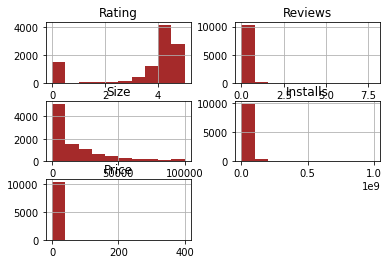

In [62]:
df.hist(color = 'brown')

## **Problem 1. Which Category has maximum apps and which has lowest apps?**

In [63]:
# doing groupby operation to extract no. of apps in each catgory
df_category_vs_count = df.groupby('Category').App.count().sort_values(ascending = False).reset_index()
# renaming the columns  
df_category_vs_count.rename(columns = {'Category':'App Catagory', 'App':'No. of Apps'}, inplace = True)

In [64]:
df_category_vs_count   #We can see the output of above groupby operation

,App Catagory,No. of Apps
0,FAMILY,1942
1,GAME,1121
2,TOOLS,843
3,BUSINESS,427
4,MEDICAL,408
5,PRODUCTIVITY,407
6,PERSONALIZATION,388
7,LIFESTYLE,373
8,COMMUNICATION,366
9,FINANCE,360


Text(0, 0.5, 'No. of Apps')

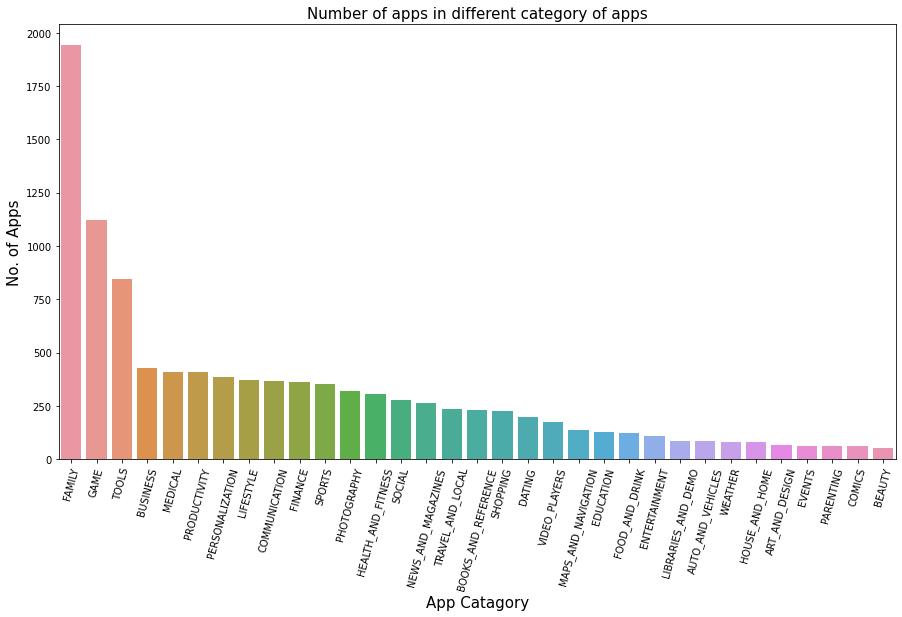

In [65]:
# Plotting the bar graph to see the popularity of each catagory in terms of number of apps
plt.figure(figsize=(15, 8))
sns.barplot(data=df_category_vs_count, x='App Catagory', y='No. of Apps')
plt.xticks(rotation=75)
plt.title('Number of apps in different category of apps',fontsize=15)
plt.xlabel('App Catagory',fontsize=15)
plt.ylabel('No. of Apps',fontsize=15)

**Insights :**

1.   Family category has the most number of apps.
2.   Beauty category has the least number of apps
3.   we can see the popularity of catagories in terms of no. of apps





# **Problem 2. Which is the most popular category among the users?**

To solve this probem we will extract average app downloads in each catagory sort them and then will plot a row chart to see the trend.

In [66]:
# doing groupby operation and finding avg installs and then sorting
df_category_vs_installs = df.groupby('Category')["Installs"].mean().sort_values(ascending=False).reset_index()
# renaming the columns of relevent data frame
df_category_vs_installs.rename(columns = {'Category':'App Catagory', 'Installs':'Avg_installs'}, inplace = True)

df_category_vs_installs 

,App Catagory,Avg_installs
0,COMMUNICATION,6.598983e+07
1,SOCIAL,4.469239e+07
2,VIDEO_PLAYERS,3.555430e+07
3,PRODUCTIVITY,3.062185e+07
4,PHOTOGRAPHY,3.019021e+07
5,GAME,2.813918e+07
6,TRAVEL_AND_LOCAL,2.684341e+07
7,ENTERTAINMENT,2.212306e+07
8,NEWS_AND_MAGAZINES,2.042886e+07
9,TOOLS,1.358573e+07


Text(0, 0.5, 'App Catagory')

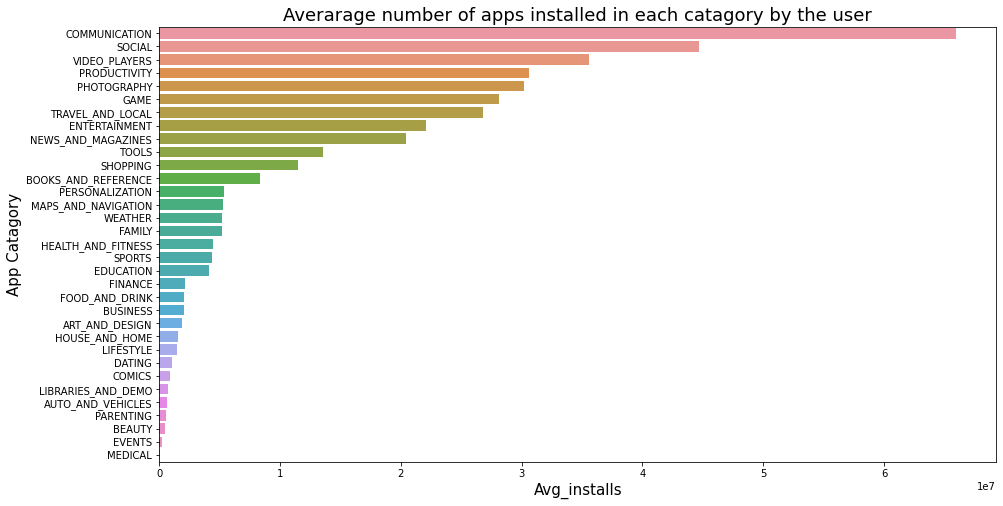

In [67]:
# plotting a row chart to see the trend
plt.figure(figsize=(15, 8))
sns.barplot(data = df_category_vs_installs, x ='Avg_installs', y='App Catagory', linewidth=2)
plt.title('Averarage number of apps installed in each catagory by the user',fontsize=18)
plt.xlabel('Avg_installs', fontsize=15)
plt.ylabel('App Catagory', fontsize=15)

**Insights :**


1.   We can see that communication related apps has most downloads
2.   Medical apps have least no of users.



We have concluded in earliar problem statement that Medical catagory has 4th highest no. of apps but it has leat no of users , we can see these kind of disparity in many of these catagories. To refect upon this we will frame next Prblem Statement.

# **Problem 3. Is there any disparity in app installs and no. of apps present in each catagory?**

To solve this problem and draw insight we need to merge two of the data frames that we created in above two problems.

In [68]:
# merging two data frames given above
df_installs_vs_counts = pd.merge(df_category_vs_count, df_category_vs_installs, on='App Catagory')
df_installs_vs_counts

,App Catagory,No. of Apps,Avg_installs
0,FAMILY,1942,5.170799e+06
1,GAME,1121,2.813918e+07
2,TOOLS,843,1.358573e+07
3,BUSINESS,427,2.022634e+06
4,MEDICAL,408,1.034416e+05
5,PRODUCTIVITY,407,3.062185e+07
6,PERSONALIZATION,388,5.346636e+06
7,LIFESTYLE,373,1.433843e+06
8,COMMUNICATION,366,6.598983e+07
9,FINANCE,360,2.139858e+06


Text(0.5, 0, 'App category')

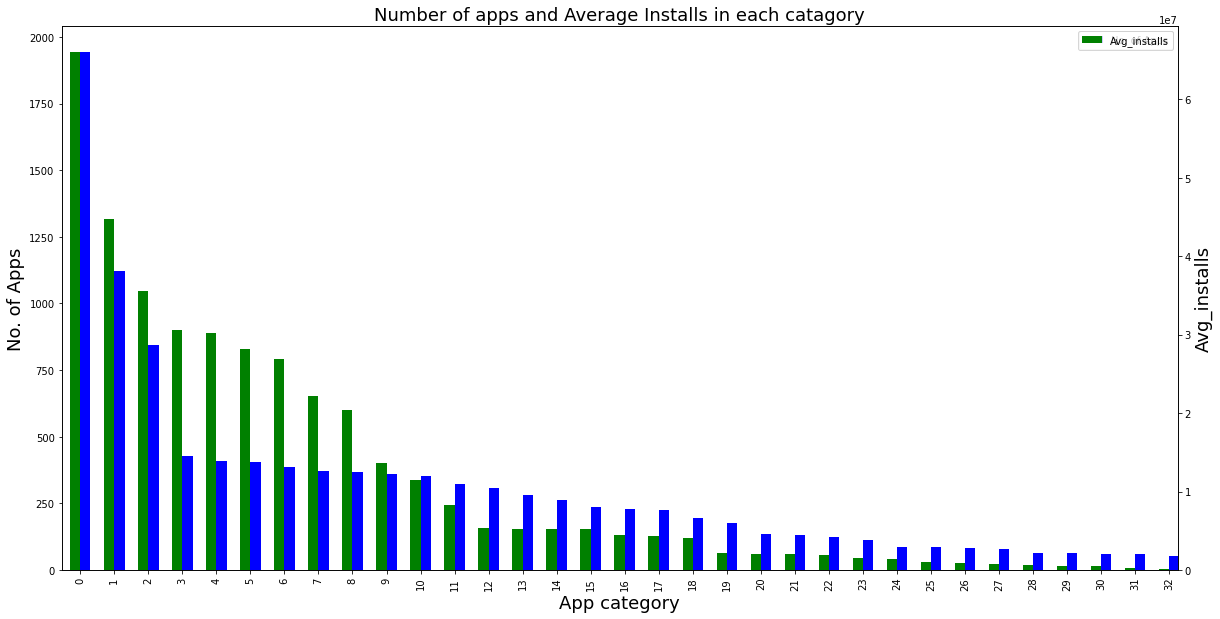

In [69]:
# plotting the above data set in which there are two Y axis (No of apps and App category) and common x axis (app catagory)
fig = plt.figure(figsize =(20,10))
ax = fig.add_subplot(111)
ax.set_xlabel('App category',fontsize = 18) 
ax.set_ylabel('No. of Apps',fontsize = 18)
ax2 = ax.twinx()
ax2.set_ylabel('Avg_installs',fontsize = 18)
width = 0.5
plt.title('Number of apps and Average Installs in each catagory',fontsize=18)
df_category_vs_count.plot(kind='bar', color='blue', ax=ax, width=0.3 , position=0)
df_category_vs_installs.plot(kind='bar', color='green', ax=ax2, width=0.3, position=1)
ax.set_xlabel('App category',fontsize = 18)


**Insights:**


  We can see from the above graph that there exists some disparity in availability of apps and its users for example lets consider index no 3 from the graph which is the catagory 'MEDICAL' we can see that there are quite a few apps but very less people to serve.




# **Problem 4 : How each catagory of apps perform in terms of customer sentiments?**

To solve this problem we need data form both the given data sets , first we will extract sentiments of users from the 2nd data set and then we will club it with app category which we will get from the first data set.

In [70]:
# using groupby operation to get the sentiment of users per app
relevent_df1 = df1.groupby(['App','Sentiment'])['Translated_Review'].count().unstack()


In [71]:
# grabing app and category column from the first data set
relevent_df2 =  df[['App','Category']]

In [72]:
# lets do left doin on app for above two dataset
relevent_df3 = pd.merge(relevent_df1, relevent_df2, left_on='App',right_on='App', how='left')
# doing aggrigate groupby operation 
catagory_vs_reviews = relevent_df3.groupby('Category').agg({'Positive': 'sum', 'Neutral': 'sum' ,'Negative': 'sum'})
catagory_vs_reviews 


,Positive,Neutral,Negative
Category,,,
ART_AND_DESIGN,240.0,60.0,54.0
AUTO_AND_VEHICLES,230.0,36.0,17.0
BEAUTY,176.0,81.0,60.0
BOOKS_AND_REFERENCE,480.0,123.0,108.0
BUSINESS,458.0,201.0,144.0
COMICS,72.0,6.0,2.0
COMMUNICATION,823.0,211.0,254.0
DATING,897.0,268.0,322.0
EDUCATION,560.0,90.0,87.0


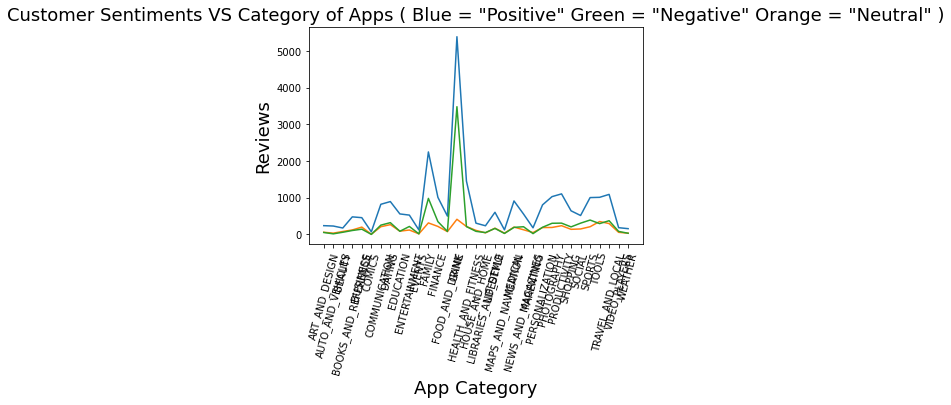

In [73]:
# lets plot the above data frame to visualize the trend

plt.plot(catagory_vs_reviews)
plt.title('Customer Sentiments VS Category of Apps ( Blue = "Positive" Green = "Negative" Orange = "Neutral" )' , fontsize = 18)
plt.ylabel('Reviews',fontsize = 18)
plt.xlabel('App Category',fontsize = 18)
plt.xticks(rotation=75)
plt.rcParams['figure.figsize'] = (20,8)

**Insights :**

1.  Most catagories have positve reviews.
2.  Some catagoris like Family and Game have relatively more negative reviews.

3.   Some catagories like Comics have mixed sentiments.





# **Problem 5 : Compare the number of apps present in the market and number of installations based on the Content Rating.**

we can approach this problem by extracting two data frames based on Content Ratings :

1.   Average Number of apps in each catagory based on Content Rating
2.   Number of average installations in each category based on Content Rating.



In [74]:
# doing groupby operation catagory wise and counting the number of apps per ratings
catagory_vs_content_rating = df.groupby(['Category','Content Rating']).App.count().unstack()
catagory_vs_content_rating = catagory_vs_content_rating.replace(np.nan,0,regex = True) #replacing null values with zero
catagory_vs_content_rating 

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Category,,,,,,
ART_AND_DESIGN,0.0,61.0,1.0,0.0,3.0,0.0
AUTO_AND_VEHICLES,0.0,83.0,1.0,0.0,1.0,0.0
BEAUTY,0.0,45.0,2.0,3.0,3.0,0.0
BOOKS_AND_REFERENCE,0.0,201.0,5.0,3.0,21.0,0.0
BUSINESS,0.0,412.0,1.0,1.0,13.0,0.0
COMICS,2.0,26.0,3.0,7.0,22.0,0.0
COMMUNICATION,0.0,325.0,0.0,10.0,31.0,0.0
DATING,0.0,18.0,0.0,168.0,10.0,0.0
EDUCATION,0.0,121.0,5.0,3.0,1.0,0.0


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

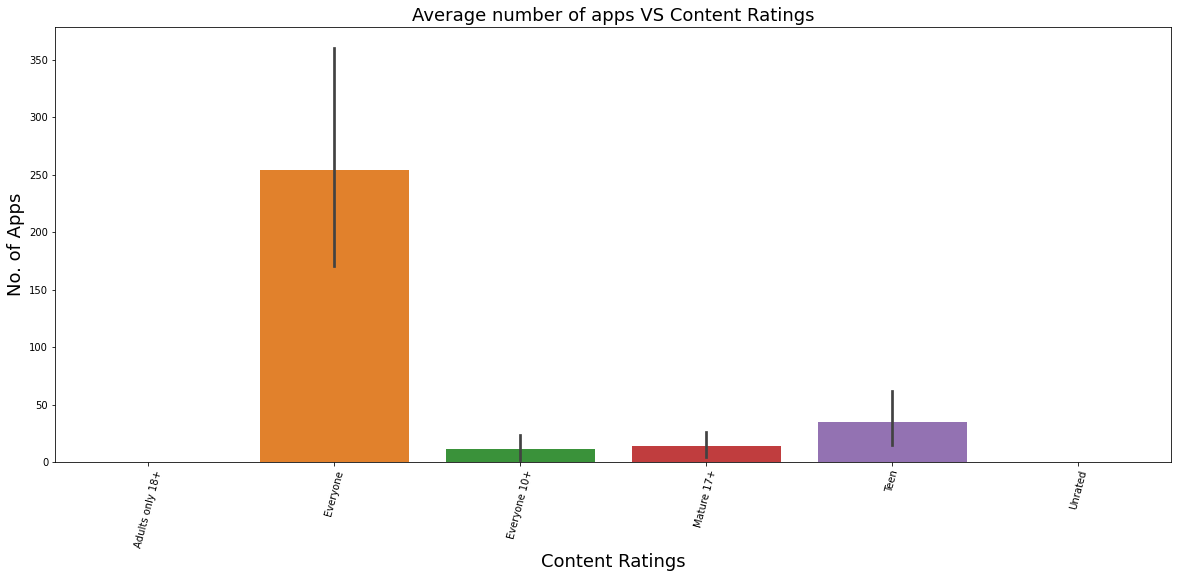

In [75]:
# Plotting Average number of apps VS Content Ratings

sns.barplot(data = catagory_vs_content_rating)
plt.title('Average number of apps VS Content Ratings', fontsize = 18)
plt.ylabel('No. of Apps',fontsize = 18)
plt.xlabel('Content Ratings',fontsize = 18)
plt.xticks(rotation=75)
# plt.rcParams['figure.figsize'] = (15,8)

We can see from the above plot that most of apps that are present in the market are rated for everyone.

In [76]:
# doing groupby operation catagory wise and counting the number of apps per ratings

catagory_vs_content_rating_istalls = df.groupby(['Category','Content Rating']).Installs.mean().unstack()
catagory_vs_content_rating_istalls = catagory_vs_content_rating_istalls.replace(np.nan,0,regex = True)
catagory_vs_content_rating_istalls


Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Category,,,,,,
ART_AND_DESIGN,0.0,1.046362e+06,5.000000e+05,0.000000e+00,2.000333e+07,0.0
AUTO_AND_VEHICLES,0.0,5.075929e+05,1.000000e+06,0.000000e+00,1.000000e+07,0.0
BEAUTY,0.0,5.937122e+05,5.500000e+04,4.000000e+04,8.333333e+04,0.0
BOOKS_AND_REFERENCE,0.0,1.175341e+06,4.222000e+06,1.833667e+06,7.874357e+07,0.0
BUSINESS,0.0,2.096024e+06,1.000000e+02,5.000000e+00,7.917692e+03,0.0
COMICS,500000.0,4.798500e+05,1.700167e+05,3.300000e+05,1.808636e+06,0.0
COMMUNICATION,0.0,6.811554e+07,0.000000e+00,3.801100e+07,5.272957e+07,0.0
DATING,0.0,1.120776e+05,0.000000e+00,1.205404e+06,2.010910e+05,0.0
EDUCATION,0.0,4.123157e+06,6.400000e+06,6.833333e+05,1.000000e+06,0.0


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

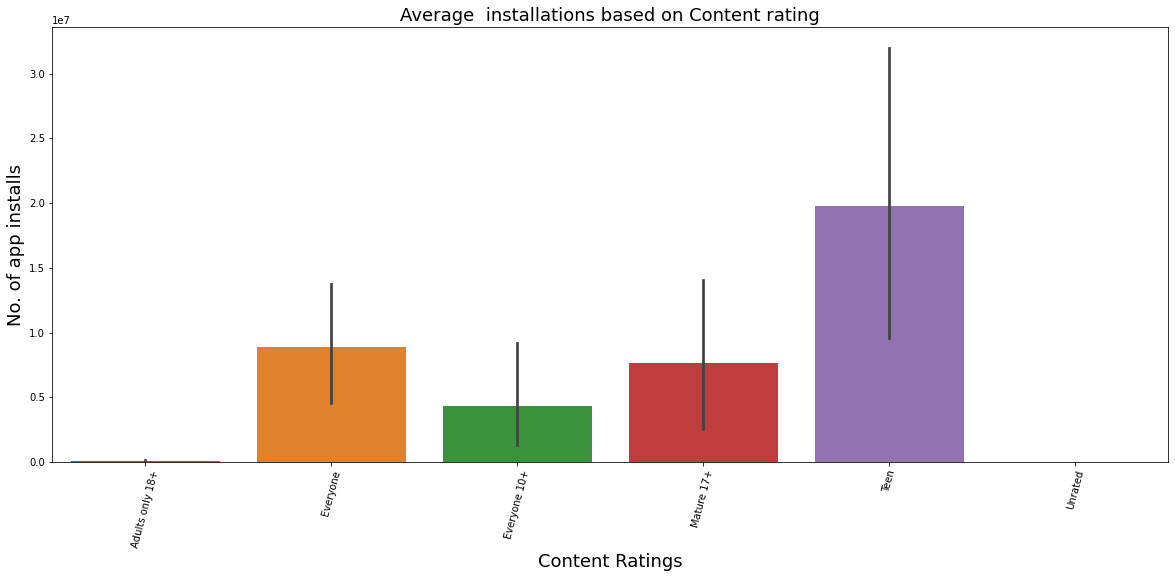

In [77]:
# Plotting the graph for Average  installations based on Content rating
sns.barplot(data = catagory_vs_content_rating_istalls)   
plt.title('Average  installations based on Content rating', fontsize = 18)
plt.ylabel('No. of app installs',fontsize = 18)
plt.xlabel('Content Ratings',fontsize = 18)
plt.xticks(rotation=75)
# plt.rcParams['figure.figsize'] = (20,8)

we can see from the above bar graph is that largest group of users have installed the apps which are rated as Teen.

**Insights :**

   what we can collect from above to graphs that "Everyone" rated apps have abundance in market but "Teen" and "Mature 17+" rated have large no. of users.



# **Problem 6. What are the top 10 apps that user installs?**

we can approach this question by gabbing columns 'App','Category' and 'Installs' from the original dataset and then we will the output in descending order based on Installs.

In [78]:
# grabbing the 'App','Category'and 'Installs' columns
relevent_df =df[['App','Category','Installs', 'Rating']]
relevent_df.sort_values(by=['Installs'],ascending = False).head(10)


,App,Category,Installs,Rating
341,Hangouts,COMMUNICATION,1.000000e+09,4.0
3928,YouTube,VIDEO_PLAYERS,1.000000e+09,4.3
451,Gmail,COMMUNICATION,1.000000e+09,4.3
3996,Google Chrome: Fast & Secure,COMMUNICATION,1.000000e+09,4.3
1700,Subway Surfers,GAME,1.000000e+09,4.5
3454,Google Drive,PRODUCTIVITY,1.000000e+09,4.4
2808,Google Photos,PHOTOGRAPHY,1.000000e+09,4.5
865,Google Play Games,ENTERTAINMENT,1.000000e+09,4.3
2853,Google Photos,PHOTOGRAPHY,1.000000e+09,4.5
411,Google Chrome: Fast & Secure,COMMUNICATION,1.000000e+09,4.3


**Insights:**

  we can collect from the table that these ten apps of different mentioned category are best performing apps and category.



# **Problem 7. What are the ratio of free and paid apps in each  category?**

In [79]:
# Doing Groupby operation by category and type 
category_vs_type_df =df.groupby(['Category','Type'])['App'].count().unstack()

In [80]:
category_vs_type_df = category_vs_type_df.replace(np.nan,0,regex=True) #replacing nan values from new dataframe
category_vs_type_df

Type,Free,Paid
Category,,
ART_AND_DESIGN,62.0,3.0
AUTO_AND_VEHICLES,82.0,3.0
BEAUTY,53.0,0.0
BOOKS_AND_REFERENCE,202.0,28.0
BUSINESS,415.0,12.0
COMICS,60.0,0.0
COMMUNICATION,339.0,27.0
DATING,189.0,7.0
EDUCATION,126.0,4.0


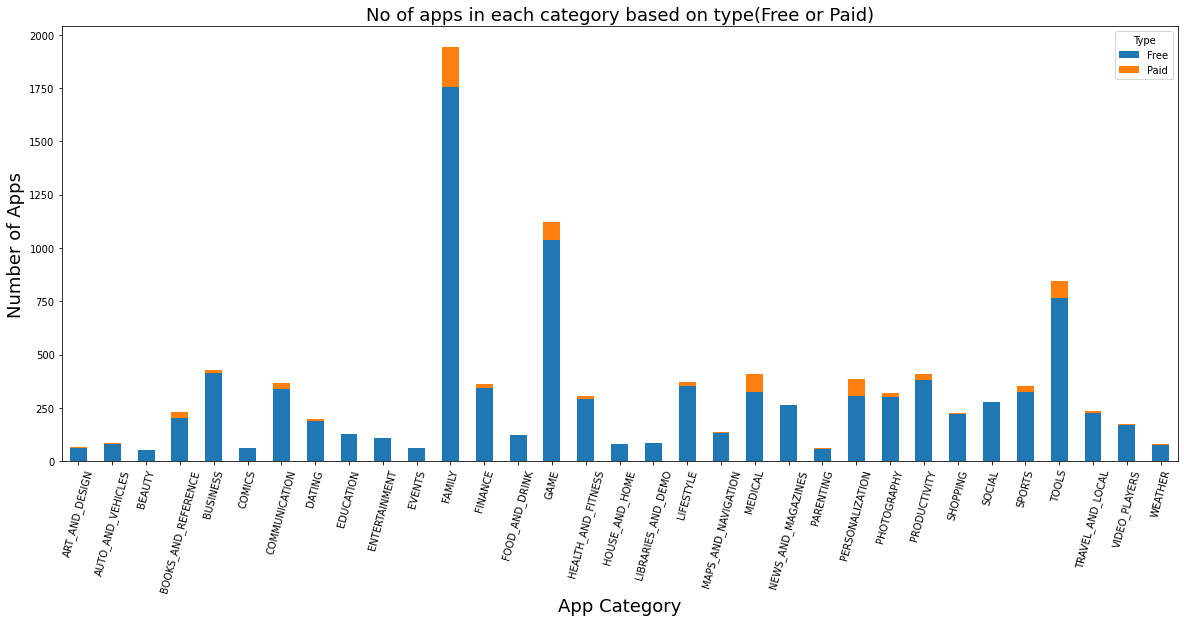

In [81]:
# plotting stacked bar graph to visualize the ratio 
category_vs_type_df.plot(kind= 'bar', stacked = True)
plt.title('No of apps in each category based on type(Free or Paid)', fontsize = 18)
plt.ylabel('Number of Apps',fontsize = 18)
plt.xlabel('App Category',fontsize = 18)
plt.xticks(rotation=75)
plt.rcParams['figure.figsize'] = (20,8)

# **Probem 8. Show the category wise avg rating and respective outliers .**

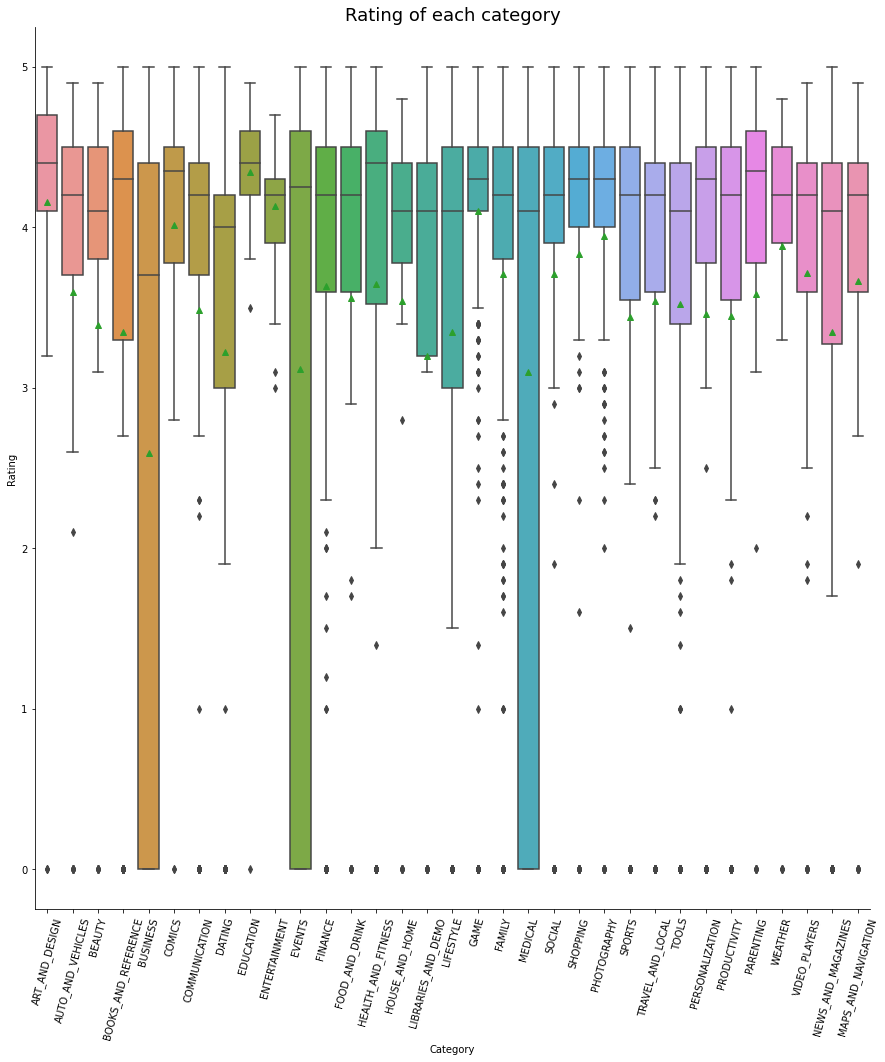

In [82]:
# plotting a box plot category wise to know the avg rating across the category
sns.catplot(x='Category',y='Rating',data=df,kind='box',height=13,showmeans = True)
sns.color_palette("viridis", as_cmap=True)
plt.title("Rating of each category", size=18)
plt.xticks(rotation=75)
plt.show()

**Insights:** 


   Alomost all category has average rating more than four 




# **Problem 9. What percentage of apps is supported in higher android versions.**

In [83]:
count_Android_Ver=pd.value_counts(df["Android Ver"], sort=True) #counting the values in android version colum and sorting them
count_Android_Ver.reset_index()

,index,Android Ver
0,4.1 and up,2381
1,4.0.3 and up,1451
2,4.0 and up,1337
3,Varies with device,1220
4,4.4 and up,894
5,2.3 and up,643
6,5.0 and up,546
7,4.2 and up,387
8,2.3.3 and up,279
9,2.2 and up,239


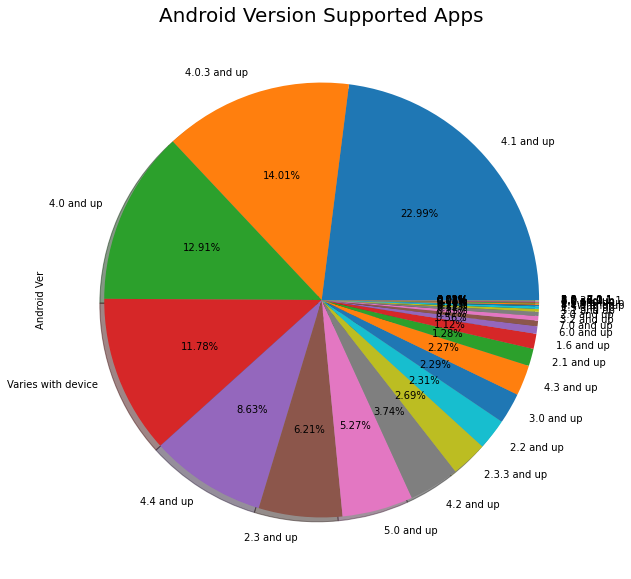

In [84]:
# plotting bar graph to know the percentage 
plt.figure(figsize=(15,10))
count_Android_Ver.plot(kind = 'pie',  autopct='%1.02f%%', shadow=True)
plt.title('Android Version Supported Apps',size=20)
plt.show()

**Insights:**

   we can infer from the above table and pie chart that approx 60% of the are supported in Android 4.0 and above , other 40% apps needs updation.



# **Problem 9. What are the top 10 Genre in terms of app availability?**

In [85]:
df_genre_vs_count = df.groupby('Genres').App.count().sort_values(ascending = False).reset_index().head(10)
df_genre_vs_count

,Genres,App
0,Tools,842
1,Entertainment,588
2,Education,527
3,Business,427
4,Medical,408
5,Productivity,407
6,Personalization,388
7,Lifestyle,372
8,Communication,366
9,Sports,364


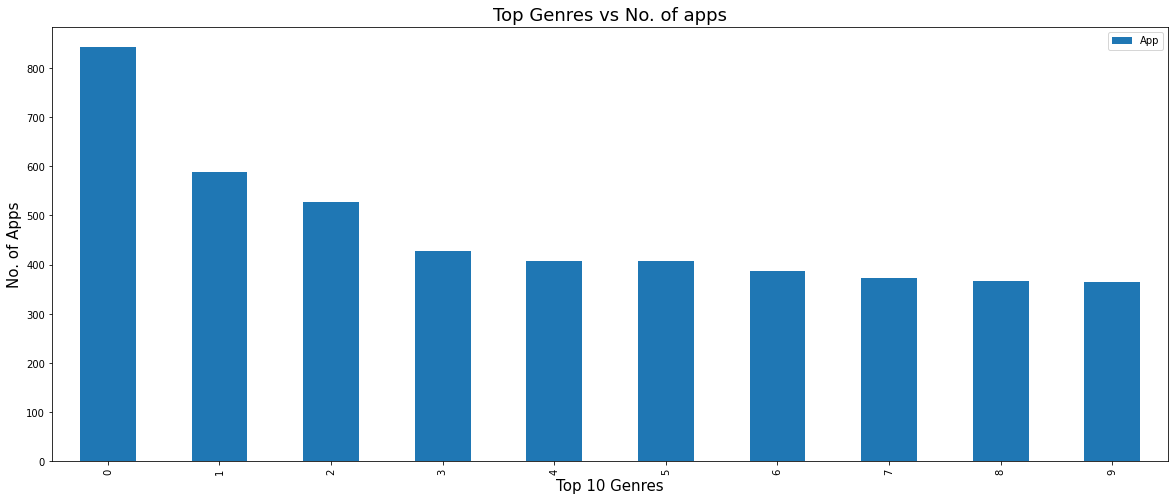

In [86]:
df_genre_vs_count.plot(kind='bar')
plt.title('Top Genres vs No. of apps',fontsize=18)
plt.xlabel('Top 10 Genres', fontsize=15)
plt.ylabel('No. of Apps', fontsize=15)
plt.show()

In [87]:
count_Android_Ver=pd.value_counts(df["Android Ver"], sort=True)

In [88]:
relevent_df = df[['App','Size']]
relevent_df

,App,Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,19000.0
1,Coloring book moana,14000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",8700.0
3,Sketch - Draw & Paint,25000.0
4,Pixel Draw - Number Art Coloring Book,2800.0
...,...,...
10836,Sya9a Maroc - FR,NaN
10837,Fr. Mike Schmitz Audio Teachings,NaN
10838,Parkinson Exercices FR,NaN
10839,The SCP Foundation DB fr nn5n,NaN


In [89]:
relevent_df.describe()

,Size
count,9875.000000
mean,18163.318380
std,22157.272563
min,0.000000
25%,2700.000000
50%,9100.000000
75%,26000.000000
max,100000.000000


**Catagory Wise top 10 best apps (Free and Paid)**

Lets check the best apps in medical catagory

In [90]:
a=df[(df.Category == 'MEDICAL')&(df.Type == 'Free')][['App']].head(10)
b=df[(df.Category == 'MEDICAL')&(df.Type == 'Paid')][['App']].head(10)

In [91]:
a

,App
2303,GoodRx Drug Prices and Coupons
2304,MyChart
2305,FollowMyHealth®
2306,CareZone
2307,Ovia Pregnancy Tracker & Baby Countdown Calendar
2308,Teladoc Member
2309,myAir™ for Air10™ by ResMed
2310,Blood Pressure
2311,Pregnancy Week By Week
2312,Doctor On Demand


In [92]:
b

,App
2243,Monash Uni Low FODMAP Diet
2244,iBP Blood Pressure
2245,Pedi STAT
2246,ASCCP Mobile
2247,Journal Club: Medicine
2248,Paramedic Protocol Provider
2249,MommyMeds
2250,Medical ID - In Case of Emergency (ICE)
2251,Human Anatomy Atlas 2018: Complete 3D Human Body
2252,Essential Anatomy 3


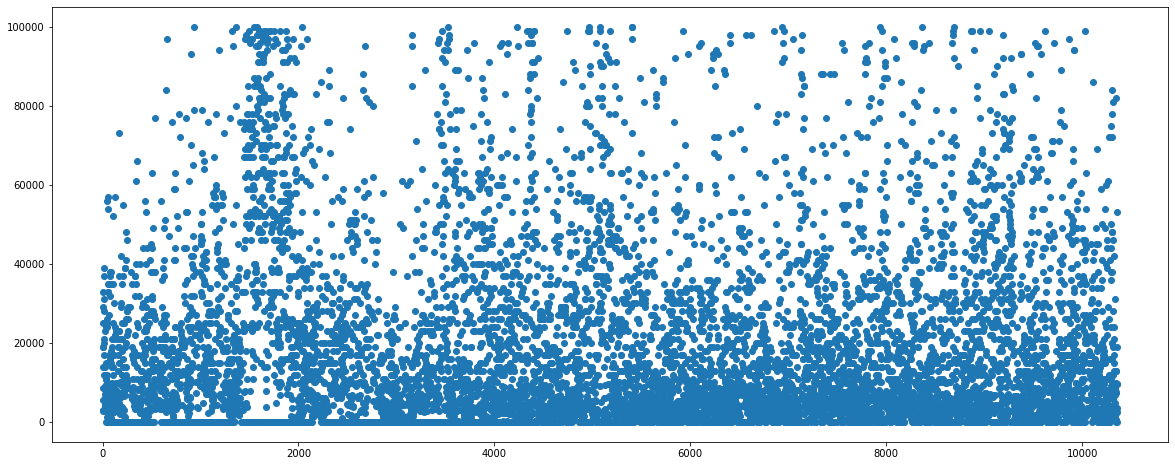

In [93]:
plt.scatter(df.index,df["Size"])

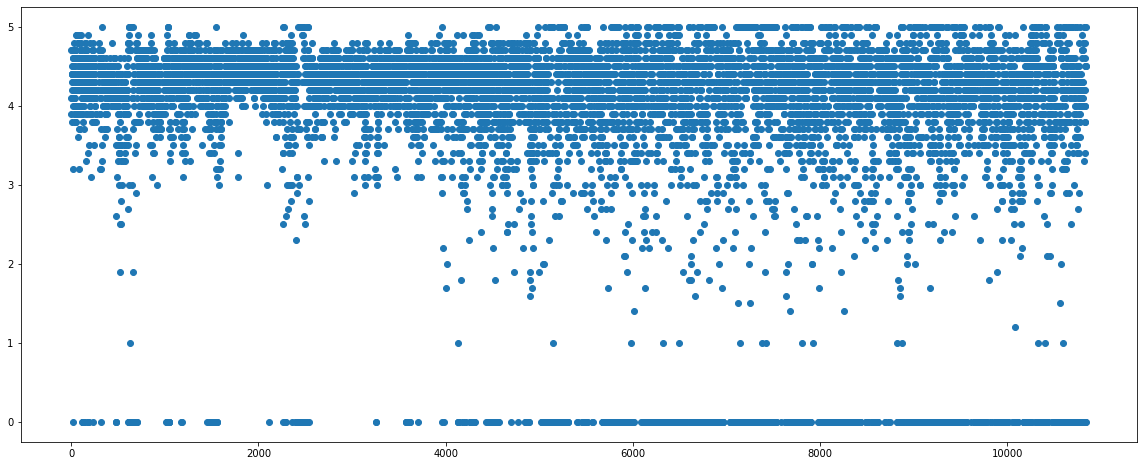

In [94]:
plt.scatter(df.index,df["Rating"])
